In [1]:
import pandas as pd
import numpy as np
import glob 
import cv2

In [2]:
df = pd.read_csv('../input/train-scene classification/train.csv')
test = pd.read_csv('../input/test_WyRytb0.csv')
sample_submision = test.copy()
test = test['image_name'].str.replace('.jpg', '')
df['image_name'] = df['image_name'].str.replace('.jpg', '')

In [3]:
df.shape

(17034, 2)

In [4]:
test.shape

(7301,)

In [5]:
test_images = []
train_images = []
image_id_list = []
for var in df['image_name']:
    image = cv2.imread('../input/train-scene classification/train/'+str(var)+'.jpg', cv2.IMREAD_COLOR)
    #image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    resized_img = cv2.resize(image, (150, 150))
    #resized_img = np.true_divide(resized_img, 255)
    #image = cv2.normalize(resized_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    train_images.append(resized_img)
    print('Train Images No : ',var)
for var in test:
    image = cv2.imread('../input/train-scene classification/train/'+str(var)+'.jpg', cv2.IMREAD_COLOR)
    #image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    resized_img = cv2.resize(image, (150, 150))
    #resized_img = np.true_divide(resized_img, 255)
    #image = cv2.normalize(resized_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    test_images.append(resized_img)
    print('Test Images No : ',var)

Train Images No :  0
Train Images No :  1
Train Images No :  2
Train Images No :  4
Train Images No :  7
Train Images No :  8
Train Images No :  9
Train Images No :  10
Train Images No :  12
Train Images No :  13
Train Images No :  15
Train Images No :  16
Train Images No :  17
Train Images No :  18
Train Images No :  19
Train Images No :  20
Train Images No :  21
Train Images No :  23
Train Images No :  24
Train Images No :  26
Train Images No :  27
Train Images No :  29
Train Images No :  31
Train Images No :  32
Train Images No :  33
Train Images No :  34
Train Images No :  35
Train Images No :  36
Train Images No :  37
Train Images No :  39
Train Images No :  40
Train Images No :  41
Train Images No :  42
Train Images No :  43
Train Images No :  44
Train Images No :  45
Train Images No :  46
Train Images No :  47
Train Images No :  48
Train Images No :  49
Train Images No :  50
Train Images No :  53
Train Images No :  54
Train Images No :  55
Train Images No :  56
Train Images No :

In [6]:
train_dataset = np.stack(train_images)
test_dataset = np.stack(test_images)

In [7]:
train_dataset.shape

(17034, 150, 150, 3)

In [8]:
test_dataset.shape

(7301, 150, 150, 3)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D
from keras.layers import MaxPooling2D, MaxPooling1D, AveragePooling2D, LeakyReLU
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [10]:
# classifier = Sequential()
# # Step 1 - Convolution
# classifier.add(Conv1D(32, 3, activation="relu", input_shape=(150, 150), bias_regularizer = 'l2'))
# classifier.add(BatchNormalization())
# # Step 2 - Pooling
# classifier.add(AveragePooling1D(pool_size = 2))

# # Adding a second convolutional layer
# classifier.add(Conv1D(64, 3, activation="relu", bias_regularizer = 'l2'))
# classifier.add(BatchNormalization())
# classifier.add(AveragePooling1D(pool_size = 2))
# classifier.add(Conv1D(128, 3, activation="relu", bias_regularizer = 'l2'))
# classifier.add(BatchNormalization())
# classifier.add(AveragePooling1D(pool_size = 2))
# # Step 3 - Flattening
# classifier.add(Flatten())
# # Step 4 - Full connection
# classifier.add(Dense(units=32, activation="relu"))
# classifier.add(Dense(units=6, activation="softmax"))
# # Compiling the CNN
# classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
# # Part 2 - Fitting the CNN to the images

In [11]:
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)))
classifier.add(BatchNormalization())
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units=32, activation="relu"))
classifier.add(Dense(units=6, activation="softmax"))
#adam = Adam(lr = 0.01, decay = 10e-6)
early_stopping = EarlyStopping(restore_best_weights=True, patience=4, mode='min')
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Part 2 - Fitting the CNN to the images

In [12]:
history = classifier.fit(train_dataset, pd.get_dummies(df['label']), epochs = 10, validation_split=0.05)

Train on 16182 samples, validate on 852 samples
Epoch 1/10
16182/16182 [==============================] - 21s 1ms/step - loss: 0.9962 - acc: 0.6088 - val_loss: 1.8872 - val_acc: 0.4378
Epoch 2/10
16182/16182 [==============================] - 15s 937us/step - loss: 0.6669 - acc: 0.7584 - val_loss: 0.6037 - val_acc: 0.7840
Epoch 3/10
16182/16182 [==============================] - 15s 939us/step - loss: 0.5544 - acc: 0.8012 - val_loss: 0.8482 - val_acc: 0.6937
Epoch 4/10
16182/16182 [==============================] - 15s 943us/step - loss: 0.4939 - acc: 0.8239 - val_loss: 0.5885 - val_acc: 0.8028
Epoch 5/10
16182/16182 [==============================] - 15s 928us/step - loss: 0.4519 - acc: 0.8404 - val_loss: 0.4669 - val_acc: 0.8509
Epoch 6/10
16182/16182 [==============================] - 15s 930us/step - loss: 0.4015 - acc: 0.8589 - val_loss: 0.4571 - val_acc: 0.8427
Epoch 7/10
16182/16182 [==============================] - 15s 927us/step - loss: 0.3634 - acc: 0.8713 - val_loss: 0.6820

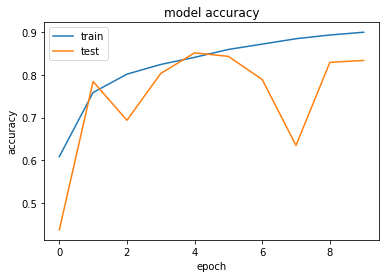

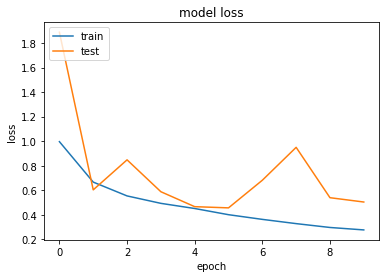

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
y_pred = classifier.predict(test_dataset)

In [15]:
y_pred = np.argmax(y_pred, 1)

In [16]:
len(y_pred)

7301

In [17]:
sample_submision['label'] = y_pred

In [18]:
sample_submision.to_csv('prediction.csv', index=False)